In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronavirusdataset/TimeAge.csv
/kaggle/input/coronavirusdataset/Case.csv
/kaggle/input/coronavirusdataset/Policy.csv
/kaggle/input/coronavirusdataset/Region.csv
/kaggle/input/coronavirusdataset/PatientInfo.csv
/kaggle/input/coronavirusdataset/SearchTrend.csv
/kaggle/input/coronavirusdataset/Weather.csv
/kaggle/input/coronavirusdataset/TimeProvince.csv
/kaggle/input/coronavirusdataset/TimeGender.csv
/kaggle/input/coronavirusdataset/SeoulFloating.csv
/kaggle/input/coronavirusdataset/Time.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('/kaggle/input/coronavirusdataset/Case.csv')
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [5]:
df.columns

Index([' case_id', 'province', 'city', 'group', 'infection_case', 'confirmed',
       'latitude', 'longitude'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()  # remove spaces in column names
df = df.drop(['case_id', 'city', 'group', 'latitude', 'longitude'], axis=1)
df = df.dropna()
df['province'] = df['province'].astype('category').cat.codes
df['infection_case'] = df['infection_case'].astype('category').cat.codes
df.head()

,province,infection_case,confirmed
0,15,34,139
1,15,50,119
2,15,26,95
3,15,71,43
4,15,10,43


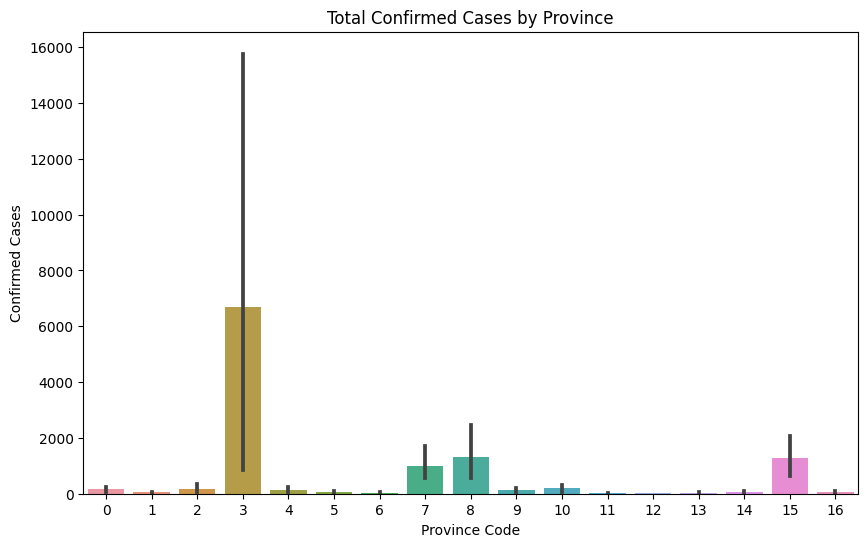

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='province', y='confirmed', data=df, estimator=sum)
plt.title('Total Confirmed Cases by Province')
plt.xlabel('Province Code')
plt.ylabel('Confirmed Cases')
plt.show()

In [8]:
X = df.drop('confirmed', axis=1)
y = df['confirmed']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: -1.621641772637806


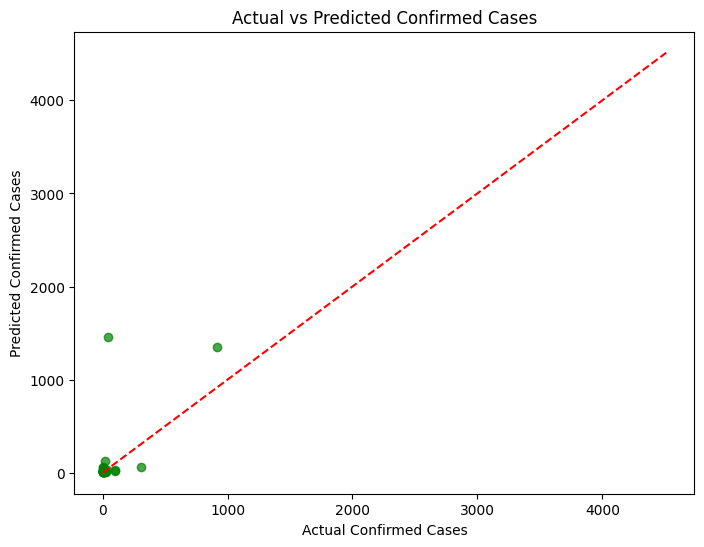

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel("Actual Confirmed Cases")
plt.ylabel("Predicted Confirmed Cases")
plt.title("Actual vs Predicted Confirmed Cases")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.show()